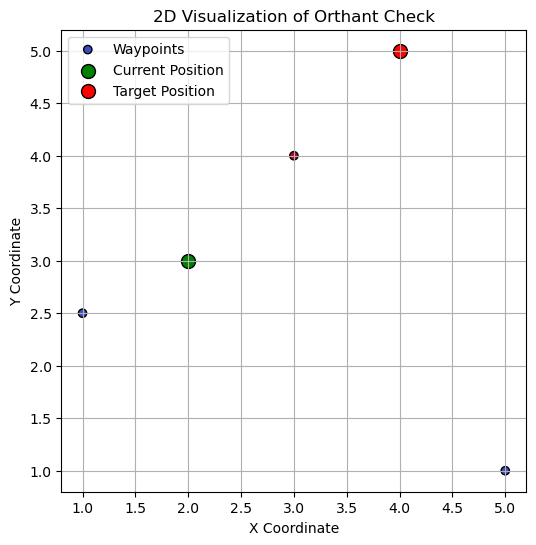

In [5]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt

def in_same_orthant(current: np.ndarray, target: np.ndarray, waypoints: np.ndarray, dims=[0,1], eps=1) -> np.ndarray:
    """
    Vectorized function to check if waypoints are in the same quadrant as the target w.r.t. the current position.

    Parameters:
    - current: np.ndarray of shape (3,) (current position)
    - target: np.ndarray of shape (3,) (target position)
    - waypoints: np.ndarray of shape (N,3) (list of waypoints)
    - dims: list of int (dimensions to consider, default [0,1] for 2D checks)
    - eps: float (tolerance for quadrant checks)

    Returns:
    - np.ndarray of shape (N,) (boolean array indicating which waypoints are in the same quadrant)
    """
    # Extract only relevant dimensions
    current = current[dims]
    target = target[dims]
    waypoints = waypoints[:, dims]

    # Check if waypoints are in the same orthant
    target_rel =  current - target
    waypoints_rel=current - waypoints
    return np.all(((target_rel >= -eps) & (waypoints_rel >= -eps))| ((target_rel <= eps) & (waypoints_rel <= eps)), axis=1)

# Example usage
current = np.array([2.0, 3.0, 0.0])
waypoints = np.array([
    [1.0, 2.5, 0.0], 
    [3.0, 4.0, 0.0], 
    [5.0, 1.0, 0.0]
])
target = np.array([4.0, 5.0, 0.0])

# Compute which waypoints are in the same orthant
same_orthant = in_same_orthant(current, target, waypoints,eps=0.5)

# Plotting
fig, ax = plt.subplots(figsize=(6,6))

# Plot waypoints
ax.scatter(waypoints[:, 0], waypoints[:, 1], c=same_orthant, cmap='coolwarm', label="Waypoints", edgecolors="black")

# Plot current and target points in different colors
ax.scatter(*current[:2], color='green', s=100, label="Current Position", edgecolors="black")
ax.scatter(*target[:2], color='red', s=100, label="Target Position", edgecolors="black")

# Labels and legend
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("2D Visualization of Orthant Check")
ax.legend()
ax.grid(True)

# Show plot
plt.show()


In [6]:
same_orthant 


array([False,  True, False])